In [678]:
import pandas as pd
import datetime 
import os
import numpy as np

# Backup

In [693]:
# linkedIn['yearstrip'] = linkedIn['Date (ISO Year Week)'].str.split(',').str[1].str.strip().str[:5]
# linkedIn['yearstrip'] = linkedIn['yearstrip'].apply(lambda x: x.strip(' '))
# linkedIn['iso_year'] = linkedIn['yearstrip'].apply(lambda x: int(x))
# linkedIn['weekstrip'] = linkedIn['Date (ISO Year Week)'].str.split('(').str[1].str.strip().str[5:7]
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: x.strip(')'))
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: x.strip(' '))
# linkedIn['iso_week'] = linkedIn['weekstrip'].apply(lambda x: int(x))
# linkedIn['weekstrip'] = linkedIn['weekstrip'].apply(lambda x: '0'+x if len(x)<2 else x)
# linkedIn['model_week_strip'] = linkedIn['yearstrip'] + linkedIn['weekstrip']
# linkedIn['model_week'] =linkedIn['model_week_strip'].apply(lambda x: int(x))
# linkedIn['iso_week'] = linkedIn['weekstrip'].apply(lambda x: int(x))
# linkedIn['model_week_strip'] = linkedIn['yearstrip'] + linkedIn['weekstrip']
# linkedIn['model_week'] =linkedIn['model_week_strip'].apply(lambda x: int(x))
# linkedIn = linkedIn[['model_week', 'Campaign group name', 'Total spent', 'iso_week', 'iso_year', 'model_week']].rename({'Total spent':'linkedIn_search_ad_spend', 'Campaign group name':'Country/Territory'}, axis=1)


# Code

In [932]:
# folder_path = "data/usaonlyanalysis"
# filenames = os.listdir(folder_path)
# print(filenames)
# for i in range(0, len(filenames)):
#     print(filenames[i])
#     print(i)

# Raw Imports

In [1052]:
podcasts_raw = pd.read_csv(folder_path + '/' + 'TPE Podcast Downloads_2022-01-01_to_2025-06-05.csv')
linkedIn_raw = pd.read_csv(folder_path + '/' + 'Impact_ Linkedin Ads Overview Report v2_NA - D_W_M_Table.csv')
paidgifting_raw = pd.read_csv(folder_path + '/' +  'paid_Gifting.csv')
fb_raw = pd.read_csv(folder_path + '/' + 'Impact_ Facebook Ads Overview Report_NA - D_W_M + Creatives_Table.csv')
events_raw = pd.read_csv(folder_path + '/' + 'EventsDataAgg - usonly.csv')
mqls_raw = pd.read_csv(folder_path + '/' + 'daily_mqls_pulled_20250617.csv')
# mqls_raw = pd.read_csv(folder_path + '/' + 'mql_exclude_admin.csv')
emails_raw = pd.read_csv(folder_path + '/' + 'MarketoData.csv' )
google_search_raw = pd.read_csv(folder_path + '/' + 'GoogleSearchConsulExport-USOnly-DailyImpressions.csv')
google_ads_raw = pd.read_csv(folder_path + '/' +  'DEPT Initial Report - US ONLY.csv')
direct_raw = pd.read_csv(folder_path + '/' + 'DirectBuy.csv')
google_events_ga4_2024 = pd.read_csv(folder_path+'/'+'2024 Google Analytics Data.csv')
google_events_ga4_2025 = pd.read_csv(folder_path+'/'+'2025 Google Analytics Data.csv')


# GA4 Web Events Data

In [1053]:
google_events_ga4_2025['Date'].min()
google_events_ga4_2025['Date'].max()

'Set-Cookie:crlf=injection'

In [1054]:
google_web_events_ga4 = pd.concat([google_events_ga4_2025, google_events_ga4_2024], ignore_index=True)
google_web_events_ga4 = google_web_events_ga4[google_web_events_ga4['Date']!='Set-Cookie:crlf=injection']

In [1055]:
google_web_events_ga4['date'] = google_web_events_ga4['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").date())
google_web_events_ga4['iso_week'] = google_web_events_ga4['date'].apply(lambda x: x.isocalendar().week)
google_web_events_ga4['iso_year'] = google_web_events_ga4['date'].apply(lambda x: x.isocalendar().year)
google_web_events_ga4['weekstr'] = google_web_events_ga4['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_web_events_ga4['yearstr'] = google_web_events_ga4['iso_year'].apply(lambda x: str(x))
google_web_events_ga4['model_week_str'] = google_web_events_ga4['yearstr'] + google_web_events_ga4['weekstr']
google_web_events_ga4['model_week'] =google_web_events_ga4['model_week_str'].apply(lambda x: int(x))
google_web_events_ga4 = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'Sessions', 'Page location']].rename({'Sessions':'ga4_sessions', 'Page location':'ga4_page_path'}, axis=1)


google_web_events_ga4['path_split'] = google_web_events_ga4['ga4_page_path'].str.split('/')
google_web_events_ga4['domain'] = google_web_events_ga4['path_split'].apply(lambda x: x[2])
google_web_events_ga4['domainsub1'] = google_web_events_ga4['path_split'].apply(lambda x: x[3] if len(x)>3 else '')

## Daily All Data

In [1056]:
google_daily_traffic = google_web_events_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

## Daily ImpactDotCom

In [1057]:
impactDotComPageInclusions =  pd.read_csv(folder_path+'/'+'ga4_domain_data_summary - mpact.com-domain-summary.csv')
impactDotComPageInclusions = impactDotComPageInclusions[impactDotComPageInclusions['Include']=='Yes']

In [1058]:
impactDotComPageInclusions.fillna('')
impactDotComPageInclusions

,Unnamed: 0,domainsub1,ga4_sessions,Include
0,0,NaN,3572169,Yes
1,1,partners,440737,Yes
2,2,affiliate-marketing,283069,Yes
3,3,request-a-demo-for-brands,165854,Yes
4,4,integrated-platform-prices,118149,Yes
...,...,...,...,...
70,70,find-influencers,279,Yes
72,72,onesheets,267,Yes
73,73,saasquatch,240,Yes
74,74,warc-research-report,230,Yes


In [1059]:
impactDotCom_daily_ga4 = google_web_events_ga4[(google_web_events_ga4['domain']=='impact.com') &(google_web_events_ga4['domainsub1'].isin(impactDotComPageInclusions['domainsub1'])) ]

In [1060]:
impactDotCom_daily_ga4

,model_week,date,iso_week,iso_year,ga4_sessions,ga4_page_path,path_split,domain,domainsub1
2061,202517,2025-04-22,17,2025,1807.0,https://impact.com/case-studies/olipop-case-st...,"[https:, , impact.com, case-studies, olipop-ca...",impact.com,case-studies
2685,202521,2025-05-22,21,2025,1402.0,https://impact.com/affiliate-marketing/,"[https:, , impact.com, affiliate-marketing, ]",impact.com,affiliate-marketing
3058,202516,2025-04-15,16,2025,1254.0,https://impact.com/affiliate-marketing/,"[https:, , impact.com, affiliate-marketing, ]",impact.com,affiliate-marketing
3085,202521,2025-05-20,21,2025,1254.0,https://impact.com/partners/affiliate-partners/,"[https:, , impact.com, partners, affiliate-par...",impact.com,partners
3198,202523,2025-06-05,23,2025,1217.0,https://impact.com/case-studies/olipop-case-st...,"[https:, , impact.com, case-studies, olipop-ca...",impact.com,case-studies
...,...,...,...,...,...,...,...,...,...
199723,202424,2024-06-12,24,2024,80.0,https://impact.com/partnerships/5-dos-and-dont...,"[https:, , impact.com, partnerships, 5-dos-and...",impact.com,partnerships
199724,202424,2024-06-12,24,2024,80.0,https://impact.com/press-releases/,"[https:, , impact.com, press-releases, ]",impact.com,press-releases
199725,202424,2024-06-12,24,2024,80.0,https://impact.com/press-releases/impact-com-r...,"[https:, , impact.com, press-releases, impact-...",impact.com,press-releases
199726,202424,2024-06-12,24,2024,80.0,https://impact.com/request-a-demo-for-publishers/,"[https:, , impact.com, request-a-demo-for-publ...",impact.com,request-a-demo-for-publishers


In [1061]:
impactDotCom_daily_traffic = impactDotCom_daily_ga4[['model_week', 'date', 'iso_week', 'iso_year', 'ga4_sessions']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index().rename({'ga4_sessions':'impactDotCom_ga4_sessions'}, axis=1)

In [1062]:
impactDotCom_daily_traffic

,model_week,date,iso_week,iso_year,impactDotCom_ga4_sessions
0,202415,2024-04-11,15,2024,5091.0
1,202415,2024-04-12,15,2024,4936.0
2,202415,2024-04-13,15,2024,2708.0
3,202415,2024-04-14,15,2024,2665.0
4,202416,2024-04-15,16,2024,7681.0
...,...,...,...,...,...
421,202523,2025-06-06,23,2025,2731.0
422,202523,2025-06-07,23,2025,1181.0
423,202523,2025-06-08,23,2025,2992.0
424,202524,2025-06-09,24,2025,3174.0


## Path Analysis

In [1063]:
page_path_summary = google_web_events_ga4[['ga4_page_path', 'ga4_sessions']].groupby('ga4_page_path').sum().sort_values(by='ga4_sessions', ascending=False).reset_index()
page_path_summary[page_path_summary['ga4_sessions']>800000]

,ga4_page_path,ga4_sessions
0,https://app.impact.com/login.user,13102875.0
1,https://app.impact.com/secure/mediapartner/hom...,9258248.0
2,https://impact.com/,3572169.0
3,https://app.impact.com/secure/advertiser/engag...,2789849.0
4,https://app.impact.com/secure/device/auth.ihtml,2618199.0
5,https://app.impact.com/signup/none/create-new-...,2223282.0
6,https://app.impact.com/insertionorder/partner-...,1934316.0
7,https://demo.impact.com/login.user,1446796.0
8,https://app.impact.com/secure/mediapartner/mar...,1129091.0
9,https://app.impact.com/loginError.user,1114263.0


In [1064]:
page_path_summary['path_split'] = page_path_summary['ga4_page_path'].str.split('/')

In [1065]:
page_path_summary['path_split'] = page_path_summary['ga4_page_path'].str.split('/')
page_path_summary['domain'] = page_path_summary['path_split'].apply(lambda x: x[2])
page_path_summary['domainsub1'] = page_path_summary['path_split'].apply(lambda x: x[3] if len(x)>3 else '')
page_path_summary['domainsub2'] = page_path_summary['path_split'].apply(lambda x: x[4]if len(x)>4 else '')
page_path_summary['domainsub3'] = page_path_summary['path_split'].apply(lambda x: x[5]if len(x)>5 else '')
page_path_summary['domainsub4'] = page_path_summary['path_split'].apply(lambda x: x[6]if len(x)>6 else '')

In [1066]:
domain_summary = page_path_summary[['domain', 'ga4_sessions']].groupby('domain').sum().sort_values('ga4_sessions', ascending=False).reset_index()

In [1067]:
domain_summary.to_csv('ga4_domain_data_summary.csv')

In [1068]:
page_path_summary['domain']

0                   app.impact.com
1                   app.impact.com
2                       impact.com
3                   app.impact.com
4                   app.impact.com
                   ...            
22135               app.impact.com
22136               app.impact.com
22137               app.impact.com
22138    creators.audibletrial.com
22139    creators.audibletrial.com
Name: domain, Length: 22140, dtype: object

In [1069]:
impactDotComPages = page_path_summary[page_path_summary['domain']=='impact.com']

In [1070]:
impactDotComPages[['domainsub1', 'ga4_sessions']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

,domainsub1,ga4_sessions
0,,3572169.0
1,partners,440737.0
2,affiliate-marketing,283069.0
3,request-a-demo-for-brands,165854.0
4,integrated-platform-prices,118149.0
...,...,...
130,?utm_source=linkedin&utm_medium=brand-organic-...,74.0
131,?_gl=xxxxxxxxxxxxxxxxxx&gclid=Cj0KCQiA-5a9BhCB...,74.0
132,impact-com-creator-influencer-marketing-platfo...,74.0
133,?utm_source=stripe.com&utm_medium=referral&utm...,74.0


In [1071]:
impactDotComPagesSummary = impactDotComPages[['domainsub1', 'ga4_sessions']].groupby('domainsub1').sum().sort_values('ga4_sessions', ascending=False).reset_index()

In [1072]:
impactDotComPagesSummary.to_csv('impactDotComPagesSummary.csv')

# Google Ads

In [1073]:
google_ads = google_ads_raw.copy()
google_ads = google_ads[google_ads['Account name']=='Impact Radius']
google_ads['date'] = google_ads['Day'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
google_ads['iso_week'] = google_ads['date'].apply(lambda x: x.isocalendar().week)
google_ads['iso_year'] = google_ads['date'].apply(lambda x: x.isocalendar().year)
google_ads['weekstr'] = google_ads['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_ads['yearstr'] = google_ads['iso_year'].apply(lambda x: str(x))
google_ads['model_week_str'] = google_ads['yearstr'] + google_ads['weekstr']
google_ads['model_week'] =google_ads['model_week_str'].apply(lambda x: int(x))
google_ads = google_ads[['model_week', 'date', 'iso_week', 'iso_year', 'Cost', 'Impr.']].rename({'Cost':'googleAds_spend', 'Impr.':'googleAds_impressions'}, axis=1)

# Podcast

In [1074]:
podcasts = podcasts_raw.copy()
podcasts['date'] = podcasts['Date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
podcasts['iso_week'] = podcasts['date'].apply(lambda x: x.isocalendar().week)
podcasts['iso_year'] = podcasts['date'].apply(lambda x: x.isocalendar().year)
podcasts['weekstr'] = podcasts['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
podcasts['yearstr'] = podcasts['iso_year'].apply(lambda x: str(x))
podcasts['model_week_str'] = podcasts['yearstr'] + podcasts['weekstr']
podcasts['model_week'] =podcasts['model_week_str'].apply(lambda x: int(x))
podcasts = podcasts[['model_week', 'date', 'iso_week', 'iso_year', 'Downloads']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Downloads':'podcast_streams'}, axis=1).reset_index()

In [1075]:
podcasts['date']

0       2022-06-03
1       2022-06-04
2       2022-06-05
3       2022-06-06
4       2022-06-07
           ...    
1094    2025-06-01
1095    2025-06-02
1096    2025-06-03
1097    2025-06-04
1098    2025-06-05
Name: date, Length: 1099, dtype: object

# LinkedIn

In [1076]:
linkedIn = linkedIn_raw.copy()


In [1077]:
linkedIn = linkedIn_raw.copy()
linkedIn['date'] = linkedIn['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y").date())
linkedIn['iso_week'] = linkedIn['date'].apply(lambda x: x.isocalendar().week)
linkedIn['iso_year'] = linkedIn['date'].apply(lambda x: x.isocalendar().year)
linkedIn['weekstr'] = linkedIn['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
linkedIn['yearstr'] = linkedIn['iso_year'].apply(lambda x: str(x))
linkedIn['model_week_str'] = linkedIn['yearstr'] + linkedIn['weekstr']
linkedIn['model_week'] =linkedIn['model_week_str'].apply(lambda x: int(x))
linkedIn = linkedIn[['model_week', 'date', 'iso_week', 'iso_year', 'Total spent', 'Impressions','Clicks' ]].rename({'Total spent':'linkedin_spend','Impressions':'linkedin_impressions', 'Clicks':'linkedin_clicks' }, axis=1)

# FB

In [1078]:
fb_raw

,Date,Amount spent,Impressions,Link clicks,CTR (link click-through rate),CPM,CPC (link),On-Facebook leads,Cost per on-Facebook lead,Website conversions,Frequency
0,"Jun 11, 2025",712.51,38520,171,0.004439,18.497144,4.166725,11,64.773636,53,NaN
1,"Jun 10, 2025",2294.01,143786,680,0.004729,15.954335,3.373544,58,39.551897,237,NaN
2,"Jun 9, 2025",2274.63,143534,719,0.005009,15.847325,3.163602,49,46.421020,272,NaN
3,"Jun 8, 2025",2374.80,147653,759,0.005140,16.083656,3.128854,52,45.669231,243,NaN
4,"Jun 7, 2025",2265.68,142247,766,0.005385,15.927788,2.957807,51,44.425098,258,NaN
...,...,...,...,...,...,...,...,...,...,...,...
855,"Jan 7, 2023",1041.89,54117,295,0.005451,19.252545,3.531831,20,52.094500,31,NaN
856,"Jan 6, 2023",1052.34,58945,307,0.005208,17.852914,3.427818,14,75.167143,37,NaN
857,"Jan 5, 2023",1047.54,55214,303,0.005488,18.972362,3.457228,12,87.295000,43,NaN
858,"Jan 4, 2023",1048.24,49117,283,0.005762,21.341694,3.704028,20,52.412000,32,NaN


In [1079]:
fb = fb_raw.copy()
fb['date'] = fb['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y").date())
fb['iso_week'] = fb['date'].apply(lambda x: x.isocalendar().week)
fb['iso_year'] = fb['date'].apply(lambda x: x.isocalendar().year)
fb['weekstr'] = fb['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
fb['yearstr'] = fb['iso_year'].apply(lambda x: str(x))
fb['model_week_str'] = fb['yearstr'] + fb['weekstr']
fb['model_week'] =fb['model_week_str'].apply(lambda x: int(x))
fb = fb[['model_week', 'date', 'iso_week', 'iso_year', 'Amount spent', 'Impressions','Link clicks' ]].rename({'Amount spent':'fb_spend','Impressions':'fb_impressions', 'Link clicks':'fb_clicks' }, axis=1)


In [1080]:
fb

,model_week,date,iso_week,iso_year,fb_spend,fb_impressions,fb_clicks
0,202524,2025-06-11,24,2025,712.51,38520,171
1,202524,2025-06-10,24,2025,2294.01,143786,680
2,202524,2025-06-09,24,2025,2274.63,143534,719
3,202523,2025-06-08,23,2025,2374.80,147653,759
4,202523,2025-06-07,23,2025,2265.68,142247,766
...,...,...,...,...,...,...,...
855,202301,2023-01-07,1,2023,1041.89,54117,295
856,202301,2023-01-06,1,2023,1052.34,58945,307
857,202301,2023-01-05,1,2023,1047.54,55214,303
858,202301,2023-01-04,1,2023,1048.24,49117,283


# Google Search

In [1081]:
google_search = google_search_raw.copy() 

In [1082]:
google_search

,Date,Clicks,Impressions,CTR,Position
0,2025-06-04,1302,95609,1.36%,23.85
1,2025-06-03,1439,89275,1.61%,23.24
2,2025-06-02,1332,96166,1.39%,25.65
3,2025-06-01,469,70008,0.67%,29.57
4,2025-05-31,437,68313,0.64%,30.08
...,...,...,...,...,...
481,2024-02-09,1177,30566,3.85%,22.44
482,2024-02-08,1272,33018,3.85%,19.90
483,2024-02-07,1444,34593,4.17%,20.09
484,2024-02-06,1559,37451,4.16%,20.79


In [1083]:
google_search['date'] = google_search['Date'].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d").date())
google_search['iso_week'] = google_search['date'].apply(lambda x: x.isocalendar().week)
google_search['iso_year'] = google_search['date'].apply(lambda x: x.isocalendar().year)
google_search['weekstr'] = google_search['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
google_search['yearstr'] = google_search['iso_year'].apply(lambda x: str(x))
google_search['model_week_str'] = google_search['yearstr'] + google_search['weekstr']
google_search['model_week'] =google_search['model_week_str'].apply(lambda x: int(x))
google_search = google_search[['model_week', 'date', 'iso_week', 'iso_year', 'Clicks', 'Impressions']].rename({'Clicks':'gSearch_sessions', 'Impressions':'gSearch_impressions'}, axis=1)

In [1084]:
google_search

,model_week,date,iso_week,iso_year,gSearch_sessions,gSearch_impressions
0,202523,2025-06-04,23,2025,1302,95609
1,202523,2025-06-03,23,2025,1439,89275
2,202523,2025-06-02,23,2025,1332,96166
3,202522,2025-06-01,22,2025,469,70008
4,202522,2025-05-31,22,2025,437,68313
...,...,...,...,...,...,...
481,202406,2024-02-09,6,2024,1177,30566
482,202406,2024-02-08,6,2024,1272,33018
483,202406,2024-02-07,6,2024,1444,34593
484,202406,2024-02-06,6,2024,1559,37451


# Paid Gifting

In [1085]:
paidgifting = paidgifting_raw.dropna().copy()
paidgifting['date']= paidgifting['gift_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
paidgifting['iso_week'] = paidgifting['date'].apply(lambda x: x.isocalendar().week)
paidgifting['iso_year'] = paidgifting['date'].apply(lambda x: x.isocalendar().year)
paidgifting['weekstr'] = paidgifting['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
paidgifting['yearstr'] = paidgifting['iso_year'].apply(lambda x: str(x))
paidgifting['model_week_str'] = paidgifting['yearstr'] + paidgifting['weekstr']
paidgifting['model_week'] =paidgifting['model_week_str'].apply(lambda x: int(x))
paidgifting = paidgifting[['model_week', 'date', 'iso_week', 'iso_year', 'gift_cost']].rename({'gift_cost':'gift_spend'}, axis=1)
paidgifting_daily = paidgifting[['model_week', 'date', 'iso_week', 'iso_year', 'gift_spend']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

# MQLs

In [1086]:
mqls_raw['date'].dtype

dtype('O')

In [1087]:
mqls = mqls_raw.copy()
mqls['date']= mqls['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").date())
mqls['iso_week'] = mqls['date'].apply(lambda x: x.isocalendar().week)
mqls['iso_year'] = mqls['date'].apply(lambda x: x.isocalendar().year)
mqls['weekstr'] = mqls['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
mqls['yearstr'] = mqls['iso_year'].apply(lambda x: str(x))
mqls['model_week_str'] = mqls['yearstr'] + mqls['weekstr']
mqls['model_week'] = mqls['model_week_str'].apply(lambda x: int(x))
mqls['mql_count'] = mqls['mql_count'].fillna(0)
mqls= mqls[['model_week', 'iso_week', 'iso_year', 'date', 'mql_count']]


In [1088]:
mqls[['mql_count']]

,mql_count
0,5
1,9
2,2
3,1
4,1
...,...
3060,4
3061,2
3062,1
3063,2


In [1089]:
mqls['mql_count'].mean()

np.float64(30.468189233278956)

# Emails

In [1090]:
emails = emails_raw.copy()
emails['date'] = emails['First Activity (PDT)'].apply(lambda x:  datetime.datetime.strptime(x,"%b %d, %Y %I:%M %p").date())
emails['iso_week'] = emails['date'].apply(lambda x: x.isocalendar().week)
emails['iso_year'] = emails['date'].apply(lambda x: x.isocalendar().year)
emails['weekstr'] = emails['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
emails['yearstr'] = emails['iso_year'].apply(lambda x: str(x))
emails['model_week_str'] = emails['yearstr'] + emails['weekstr']
emails['model_week'] =emails['model_week_str'].apply(lambda x: int(x))
emails = emails[['model_week', 'date', 'iso_week', 'iso_year', 'Sent', 'Delivered','Opened' ]].rename({'Sent':'email_sent_cnt','Delivered':'email_delivered_cnt', 'Opened':'email_opened_cnt' }, axis=1)
for var in ['email_sent_cnt', 'email_delivered_cnt','email_opened_cnt']:
    print(var)
    emails[var]=emails[var].apply(lambda x: int(x.replace(",", "")))
emails_daily = emails[['model_week', 'date', 'iso_week', 'iso_year', 'email_opened_cnt']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().reset_index()

email_sent_cnt
email_delivered_cnt
email_opened_cnt


In [1091]:
emails_daily

,model_week,date,iso_week,iso_year,email_opened_cnt
0,202323,2023-06-06,23,2023,3315
1,202323,2023-06-07,23,2023,304697
2,202323,2023-06-08,23,2023,13676
3,202324,2023-06-12,24,2023,369
4,202324,2023-06-13,24,2023,8631
...,...,...,...,...,...
292,202521,2025-05-20,21,2025,302
293,202522,2025-05-27,22,2025,376
294,202523,2025-06-02,23,2025,997
295,202523,2025-06-05,23,2025,425


# Direct

In [1092]:
direct_raw

,Status,QTR,Vertical,Month,TYPE,Launch date,Vendor,Publication (see Audience breakdown tab for details),Channel,Cost,Cost_MMM,Date_ MMM
0,Complete,Q1,Marketing,March,Lead gen campaign,3/3/2025,Morning Brew,Marketing Brew,Newsletter,NaN,$1.00,3/3/2025
1,Complete,Q1,Marketing,March,Lead gen campaign,2/15/2025,PharosIQ,PharosIS,Lead gen,"$200,000.00","$200,000.00",2/15/2025
2,Complete,Q1,Finserv,March,Lead gen campaign,3/10/2025,Industry dive,Banking Dive,Newsletter,"$7,000.00","$7,000.00",3/10/2025
3,Complete,Q1,Retail,March,Lead gen campaign,3/18/2025,Industry dive,Retail Dive,Eblast,"$8,000.00","$8,000.00",3/18/2025
4,Complete,Q1,Marketing,March,Lead gen campaign,3/18/2025,Workweek,Marketing Millenials,Newsletter ad,"$11,711.00","$11,711.00",3/18/2025
...,...,...,...,...,...,...,...,...,...,...,...,...
175,NaN,Q1,General,March,NaN,"3/8 , 3/12",Growth Hackers Daily,Growth Hackers Daily,"8 ads $6,000 (1 takeover, 2 primaries, and 5 s...","$6,000.00","$3,000.00",03/12/2023
176,NaN,Q1,General,March,NaN,3/9/2023,Industry Dive,Marketing Dive Email Blast,Eblast,"$12,000.00","$12,000.00",3/9/2023
177,NaN,Q1,Creator,March,NaN,3/9/2023,Industry Dive,Social media dive,Newsletter,"$12,500.00","$12,500.00",3/9/2023
178,NaN,Q1,Retail,March,NaN,3/9/2023,Industry Dive,Retail Dive Email Blast,Eblast,"$10,500.00","$10,500.00",3/9/2023


In [1093]:
direct= direct_raw.copy()
direct['date']= direct['Date_ MMM'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date())


direct['iso_week'] = direct['date'].apply(lambda x: x.isocalendar().week)
direct['iso_year'] = direct['date'].apply(lambda x: x.isocalendar().year)
direct['weekstr'] = direct['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
direct['yearstr'] = direct['iso_year'].apply(lambda x: str(x))
direct['model_week_str'] = direct['yearstr'] + direct['weekstr']
direct['model_week'] =direct['model_week_str'].apply(lambda x: int(x))
direct['Cost_MMM'] = direct['Cost_MMM'].apply(lambda x: float(x.replace(',','').replace('$','')) if type(x)!=float else x)
direct = direct[['model_week', 'date', 'iso_week', 'iso_year', 'Cost_MMM' ]].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Cost_MMM':'direct_spend'}, axis=1)


# Events

In [1094]:
events = events_raw[events_raw['Region']=='NAM']
events = events[events['Event Actual Cost - Pls input in SF campaign'].isnull()==False]
events['date']= events['Event Start Date'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").date())
events['iso_week'] = events['date'].apply(lambda x: x.isocalendar().week)
events['iso_year'] = events['date'].apply(lambda x: x.isocalendar().year)
events['weekstr'] = events['iso_week'].apply(lambda x: '0' + str(x) if len(str(x))<2 else str(x))
events['yearstr'] = events['iso_year'].apply(lambda x: str(x))
events['model_week_str'] = events['yearstr'] + events['weekstr']
events['model_week'] =events['model_week_str'].apply(lambda x: int(x))
events = events[['model_week', 'date', 'iso_week', 'iso_year', 'Event Actual Cost - Pls input in SF campaign']].groupby(['model_week', 'date', 'iso_week', 'iso_year']).sum().rename({'Event Actual Cost - Pls input in SF campaign':'event_spend'}, axis=1).reset_index()


In [1095]:
events

,model_week,date,iso_week,iso_year,event_spend
0,202304,2023-01-23,4,2023,18298.0
1,202309,2023-02-28,9,2023,69279.0
2,202313,2023-03-27,13,2023,66790.0
3,202313,2023-04-02,13,2023,40918.0
4,202314,2023-04-04,14,2023,29270.0
5,202318,2023-05-04,18,2023,45043.0
6,202324,2023-06-13,24,2023,916994.0
7,202325,2023-06-20,25,2023,16500.0
8,202331,2023-07-31,31,2023,26351.0
9,202337,2023-09-11,37,2023,65465.0


# Combined DF

In [1096]:
impactDotCom_daily_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   impactDotCom_ga4_sessions  426 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 16.8+ KB


In [1097]:
combined = pd.merge(google_daily_traffic, podcasts, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, linkedIn, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_search, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, paidgifting_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, emails_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, direct, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, fb, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, google_ads, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, events, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape
combined = pd.merge(combined, impactDotCom_daily_traffic, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
combined.shape


(426, 22)

In [1098]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,email_opened_cnt,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,NaN,34666.0,1727.34,51080.0,249.0,6233.39,"12,400",NaN,340,3896.0


In [1099]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   podcast_streams            421 non-null    float64
 6   linkedin_spend             426 non-null    float64
 7   linkedin_impressions       426 non-null    int64  
 8   linkedin_clicks            426 non-null    int64  
 9   gSearch_sessions           420 non-null    float64
 10  gSearch_impressions        420 non-null    float64
 11  gift_spend                 263 non-null    float64
 12  email_opened_cnt           155 non-null    float64
 13  direct_spend               58 non-null     float64

In [1100]:
convert_fields = ['googleAds_impressions']
for var in convert_fields:
    combined[var] = combined[var].fillna('0')
    combined[var] = combined[var].apply(lambda x: float(x.replace(',','').replace('$','')))
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   podcast_streams            421 non-null    float64
 6   linkedin_spend             426 non-null    float64
 7   linkedin_impressions       426 non-null    int64  
 8   linkedin_clicks            426 non-null    int64  
 9   gSearch_sessions           420 non-null    float64
 10  gSearch_impressions        420 non-null    float64
 11  gift_spend                 263 non-null    float64
 12  email_opened_cnt           155 non-null    float64
 13  direct_spend               58 non-null     float64

In [1101]:
gaSpend_missing = combined[combined['googleAds_spend'].isnull()==True]
gaSpend_missing[['date']]

,date
51,2024-06-01
52,2024-06-02
385,2025-05-01
386,2025-05-02
387,2025-05-03
388,2025-05-04


In [1102]:
fb_missing = combined[combined['fb_spend'].isnull()==True]
fb_missing[['date']]

,date
191,2024-10-19
192,2024-10-20
193,2024-10-21
194,2024-10-22
195,2024-10-23
196,2024-10-24
197,2024-10-25
198,2024-10-26
199,2024-10-27
200,2024-10-28


In [1103]:
# spendVars = ['gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend', 'event_spend']
# for var in spendVars:
#     if combined[var].dtype != float:
#         print(combined[var].dtype)
#         combined[var] = combined[var].apply(lambda x: x.replace(',','').replace('$',''))

In [1104]:
combined[combined['event_spend']>0]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,email_opened_cnt,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions
5,202416,2024-04-16,16,2024,224572.0,151.0,10460.650000,168669,1158,1210.0,...,NaN,NaN,2164.09,105145.0,504.0,5447.02,8470.0,25720.0,52,5054.0
27,202419,2024-05-08,19,2024,242263.0,499.0,14448.280000,183731,1141,1300.0,...,NaN,NaN,2956.35,201448.0,810.0,7407.86,10015.0,17744.0,85,6568.0
54,202423,2024-06-04,23,2024,262643.0,4618.0,14440.410000,203812,1407,1266.0,...,66.0,9000.0,3033.01,180083.0,1064.0,6883.98,9810.0,6250.0,59,4178.0
109,202431,2024-07-29,31,2024,217530.0,53.0,13139.029991,244591,1284,1264.0,...,254.0,NaN,2449.76,114597.0,750.0,6749.88,15720.0,17744.0,120,4689.0
181,202441,2024-10-09,41,2024,224124.0,204.0,13807.429987,183029,1059,1176.0,...,708.0,NaN,1656.77,46939.0,279.0,6492.83,8252.0,36289.0,74,5723.0
200,202444,2024-10-28,44,2024,224246.0,100.0,6746.980000,109784,774,1217.0,...,NaN,NaN,NaN,NaN,NaN,3465.12,4726.0,21057.0,36,4450.0
222,202447,2024-11-19,47,2024,256537.0,422.0,8687.320000,123628,1061,1373.0,...,130.0,NaN,1794.93,50904.0,290.0,6265.78,8452.0,7000.0,43,4851.0
298,202506,2025-02-03,6,2025,254928.0,36.0,14518.360000,186969,1273,1236.0,...,1164.0,NaN,1822.89,90495.0,369.0,4397.18,7095.0,32676.0,70,4579.0
299,202506,2025-02-04,6,2025,259275.0,37.0,14522.430000,192742,1390,1350.0,...,189.0,17381.0,1767.05,77220.0,347.0,5794.73,7354.0,103919.0,79,4764.0
349,202513,2025-03-26,13,2025,295692.0,2739.0,8739.670000,126300,1314,1310.0,...,NaN,NaN,2142.56,93726.0,438.0,6244.26,9381.0,6421.0,55,4727.0


In [1105]:
naFillVars = ['fb_spend', 'gift_spend', 'fb_impressions', 'fb_clicks','googleAds_spend', 'email_opened_cnt', 'gift_spend', 'direct_spend','event_spend']
for var in naFillVars:
    combined[var] = combined[var].fillna(0)

In [1106]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,email_opened_cnt,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,0.0,34666.0,1727.34,51080.0,249.0,6233.39,12400.0,0.0,340,3896.0


In [1107]:
combined[['linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend','event_spend']]

,linkedin_spend,gift_spend,direct_spend,fb_spend,googleAds_spend,event_spend
0,11063.50,0.00,9000.0,2169.57,6448.16,0.0
1,10985.40,498.86,0.0,2189.92,4544.18,0.0
2,8826.29,0.00,0.0,2140.88,1676.13,0.0
3,7257.84,0.00,0.0,2404.75,2054.01,0.0
4,10275.43,339.42,0.0,2307.37,5510.42,0.0
...,...,...,...,...,...,...
421,11533.45,0.00,0.0,2143.19,4599.39,0.0
422,10198.90,0.00,0.0,2265.68,3656.27,0.0
423,4765.20,0.00,0.0,2374.80,3816.07,0.0
424,11931.42,0.00,0.0,2274.63,5089.73,0.0


In [1108]:
combined.loc[:, spendVars].sum()

linkedin_spend     4.688612e+06
gift_spend         1.035616e+05
direct_spend       1.304820e+06
fb_spend           8.376888e+05
googleAds_spend    1.923729e+06
dtype: float64

In [1109]:
spendingSummary = combined[['iso_year','linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']].groupby('iso_year').sum().reset_index()
spendVars = ['linkedin_spend', 'gift_spend', 'direct_spend', 'fb_spend', 'googleAds_spend']
for var in spendVars:
    print(var)
    spendingSummary[var] = spendingSummary[var].apply(lambda x: '{:,.2f}'.format(x))

linkedin_spend
gift_spend
direct_spend
fb_spend
googleAds_spend


In [1110]:
spendingSummary

,iso_year,linkedin_spend,gift_spend,direct_spend,fb_spend,googleAds_spend
0,2024,"2,858,585.91","61,495.78","798,634.00","559,556.91","1,295,373.29"
1,2025,"1,830,025.65","42,065.79","506,186.00","278,131.88","628,355.34"


In [1111]:
combined['date'].min()

datetime.date(2024, 4, 11)

In [1112]:
combined['date'].max()

datetime.date(2025, 6, 10)

In [1113]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_week                 426 non-null    int64  
 1   date                       426 non-null    object 
 2   iso_week                   426 non-null    int64  
 3   iso_year                   426 non-null    int64  
 4   ga4_sessions               426 non-null    float64
 5   podcast_streams            421 non-null    float64
 6   linkedin_spend             426 non-null    float64
 7   linkedin_impressions       426 non-null    int64  
 8   linkedin_clicks            426 non-null    int64  
 9   gSearch_sessions           420 non-null    float64
 10  gSearch_impressions        420 non-null    float64
 11  gift_spend                 426 non-null    float64
 12  email_opened_cnt           426 non-null    float64
 13  direct_spend               426 non-null    float64

In [1114]:
combined[combined['googleAds_impressions'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,email_opened_cnt,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions


In [1115]:
combined[combined['mql_count'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,email_opened_cnt,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions


In [1116]:
combined[combined['date']==pd.Timestamp('2024-10-14').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,email_opened_cnt,direct_spend,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions
186,202442,2024-10-14,42,2024,218483.0,129.0,11470.159996,188529,995,1142.0,...,0.0,0.0,1783.9,53071.0,299.0,6570.45,12167.0,0.0,56,3458.0


### Historical Data EDA

In [1117]:
# combined = pd.merge(google_daily_traffic, podcasts, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, linkedIn, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, google_search, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, paidgifting_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, emails_daily, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, direct, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, fb, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, google_ads, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape
# combined = pd.merge(combined, mqls, on=['model_week', 'date', 'iso_week', 'iso_year'], how='left')
# combined.shape


In [1118]:
minCase = google_ads['date'].min()
maxCase = google_ads['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2011-10-13 and the max date is 2025-06-10


In [1119]:
google_ads[:5]

,model_week,date,iso_week,iso_year,googleAds_spend,googleAds_impressions
0,201141,2011-10-13,41,2011,0.00,0
1,201142,2011-10-18,42,2011,580.00,"276,820"
2,201142,2011-10-19,42,2011,537.27,"324,325"
3,201142,2011-10-20,42,2011,645.76,"330,915"
4,201142,2011-10-21,42,2011,95.77,"3,520"


In [1120]:
minCase = fb['date'].min()
maxCase = fb['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2023-01-03 and the max date is 2025-06-11


In [1121]:
minCase = linkedIn['date'].min()
maxCase = linkedIn['date'].max()
print(f'The min date is {minCase} and the max date is {maxCase}')

The min date is 2022-01-01 and the max date is 2025-06-11


# MOnthly Data - Query Volume, Seasonality

### Query Volumne

In [1174]:
queries_raw =  pd.read_csv("data/preliminaryCSVs/UnbrandedQueryVolume - Weekly- Gene.csv")
inflation_raw =  pd.read_csv("data/usaonlyanalysis/inflation_trends.csv")
durable_goods_raw =  pd.read_csv("data/usaonlyanalysis/durable_good_index.csv")

In [ ]:
inflation = inflation_raw.copy()
inflation['date']=inflation['Date'].apply(lambda x:  datetime.datetime.strptime(x,"%B %d, %Y").date())
inflation['month'] = inflation['date'].apply(lambda x: x.month)
inflation['year'] = inflation['date'].apply(lambda x: x.year)
inflation = inflation[['date', 'month', 'year', 'Inflation']].rename({'Inflation':'inflation_rate'}, axis=1)

In [1172]:
durable_goods

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Date,US_durable_goods,NaN,NaN,NaN,NaN
2,"March 31, 2025",9.36%,NaN,NaN,NaN,NaN
3,"February 28, 2025",0.89%,NaN,NaN,NaN,NaN
4,"January 31, 2025",3.34%,NaN,NaN,NaN,NaN
5,"December 31, 2024",-1.78%,NaN,NaN,NaN,NaN
6,"November 30, 2024",-2.00%,NaN,NaN,NaN,NaN
7,"October 31, 2024",0.79%,NaN,NaN,NaN,NaN
8,"September 30, 2024",-0.40%,NaN,NaN,NaN,NaN
9,"August 31, 2024",-0.89%,NaN,NaN,NaN,NaN
10,"July 31, 2024",9.87%,NaN,NaN,NaN,NaN


In [1181]:
durable_goods = durable_goods_raw.copy()
durable_goods = durable_goods.drop(index = 0)
durable_goods['date']=durable_goods['Unnamed: 0'].apply(lambda x:  datetime.datetime.strptime(x,"%B %d, %Y").date())
durable_goods['month'] = durable_goods['date'].apply(lambda x: x.month)
durable_goods['year'] = durable_goods['date'].apply(lambda x: x.year)
durable_goods = durable_goods[['date', 'month', 'year', 'Unnamed: 1']].rename({'Unnamed: 1':'durable_goods_rates'}, axis=1)

In [1182]:
queries.columns

Index(['Keyword', 'Currency', 'Avg. monthly searches', 'Three month change',
       'YoY change', 'Competition', 'Competition (indexed value)',
       'Top of page bid (low range)', 'Top of page bid (high range)',
       'Ad impression share', 'Organic impression share',
       'Organic average position', 'In account?', 'In plan?',
       'Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'S

In [1124]:
combined['date'].unique()

array([datetime.date(2024, 4, 11), datetime.date(2024, 4, 12),
       datetime.date(2024, 4, 13), datetime.date(2024, 4, 14),
       datetime.date(2024, 4, 15), datetime.date(2024, 4, 16),
       datetime.date(2024, 4, 17), datetime.date(2024, 4, 18),
       datetime.date(2024, 4, 19), datetime.date(2024, 4, 20),
       datetime.date(2024, 4, 21), datetime.date(2024, 4, 22),
       datetime.date(2024, 4, 23), datetime.date(2024, 4, 24),
       datetime.date(2024, 4, 25), datetime.date(2024, 4, 26),
       datetime.date(2024, 4, 27), datetime.date(2024, 4, 28),
       datetime.date(2024, 4, 29), datetime.date(2024, 4, 30),
       datetime.date(2024, 5, 1), datetime.date(2024, 5, 2),
       datetime.date(2024, 5, 3), datetime.date(2024, 5, 4),
       datetime.date(2024, 5, 5), datetime.date(2024, 5, 6),
       datetime.date(2024, 5, 7), datetime.date(2024, 5, 8),
       datetime.date(2024, 5, 9), datetime.date(2024, 5, 10),
       datetime.date(2024, 5, 11), datetime.date(2024, 5, 12),
 

In [1125]:
combined['month'] = combined['date'].apply(lambda x: x.month)

In [1126]:
combined['month']

0      4
1      4
2      4
3      4
4      4
      ..
421    6
422    6
423    6
424    6
425    6
Name: month, Length: 426, dtype: int64

In [1127]:
queries

,Keyword,Currency,Avg. monthly searches,Three month change,YoY change,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,...,Searches: Jul 2024,Searches: Aug 2024,Searches: Sep 2024,Searches: Oct 2024,Searches: Nov 2024,Searches: Dec 2024,Searches: Jan 2025,Searches: Feb 2025,Searches: Mar 2025,Searches: Apr 2025
0,affiliate programs,USD,14800,22%,0%,Medium,58.0,1.16,6.23,8%,...,18100,14800,14800,12100,12100,12100,18100,12100,14800,14800
1,walmart affiliate program,USD,9900,22%,-18%,Low,24.0,0.86,1.06,NaN,...,14800,9900,18100,14800,9900,8100,8100,8100,6600,9900
2,multi touch attribution,USD,1300,23%,23%,Medium,38.0,11.66,29.36,NaN,...,1000,1000,1000,1300,1300,1000,1300,1300,1600,1600
3,affiliate networks,USD,2900,-19%,52%,Low,21.0,3.53,18.28,13%,...,2400,1900,1900,2400,2400,2400,2900,5400,9900,4400
4,referral software,USD,320,50%,22%,Low,28.0,11.94,38.04,38%,...,260,260,260,260,320,260,320,260,390,390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,the attribution model,USD,10,0%,0%,Low,14.0,NaN,NaN,NaN,...,10,0,0,10,10,10,10,10,10,10
432,touch attribution,USD,20,-33%,100%,Low,11.0,NaN,NaN,NaN,...,10,10,10,20,20,30,20,30,10,20
433,use a pie chart,USD,30,400%,-29%,Low,0.0,NaN,NaN,NaN,...,30,10,10,40,50,10,10,10,30,50
434,voucher marketing,USD,10,0%,0%,Low,20.0,NaN,NaN,NaN,...,40,10,10,10,10,10,10,10,10,10


In [1128]:
queryMonthlyDF = queries[['Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'Searches: Aug 2023', 'Searches: Sep 2023', 'Searches: Oct 2023',
       'Searches: Nov 2023', 'Searches: Dec 2023', 'Searches: Jan 2024',
       'Searches: Feb 2024', 'Searches: Mar 2024', 'Searches: Apr 2024',
       'Searches: May 2024', 'Searches: Jun 2024', 'Searches: Jul 2024',
       'Searches: Aug 2024', 'Searches: Sep 2024', 'Searches: Oct 2024',
       'Searches: Nov 2024', 'Searches: Dec 2024', 'Searches: Jan 2025',
       'Searches: Feb 2025', 'Searches: Mar 2025', 'Searches: Apr 2025']].sum().reset_index().rename({'index':'month_text', 0:'query_volume'}, axis=1)

In [1129]:
queryMonthlyDF.columns


Index(['month_text', 'query_volume'], dtype='object')

In [1130]:
import calendar


#datetime_object = datetime.datetime.strptime(month_abbr, "%b")

def days_in_month(year, month):
  """Returns the number of days in a given month of a given year."""
  return calendar.monthrange(year, month)[1]

In [1131]:
date_columns = ['Searches: May 2021', 'Searches: Jun 2021', 'Searches: Jul 2021',
       'Searches: Aug 2021', 'Searches: Sep 2021', 'Searches: Oct 2021',
       'Searches: Nov 2021', 'Searches: Dec 2021', 'Searches: Jan 2022',
       'Searches: Feb 2022', 'Searches: Mar 2022', 'Searches: Apr 2022',
       'Searches: May 2022', 'Searches: Jun 2022', 'Searches: Jul 2022',
       'Searches: Aug 2022', 'Searches: Sep 2022', 'Searches: Oct 2022',
       'Searches: Nov 2022', 'Searches: Dec 2022', 'Searches: Jan 2023',
       'Searches: Feb 2023', 'Searches: Mar 2023', 'Searches: Apr 2023',
       'Searches: May 2023', 'Searches: Jun 2023', 'Searches: Jul 2023',
       'Searches: Aug 2023', 'Searches: Sep 2023', 'Searches: Oct 2023',
       'Searches: Nov 2023', 'Searches: Dec 2023', 'Searches: Jan 2024',
       'Searches: Feb 2024', 'Searches: Mar 2024', 'Searches: Apr 2024',
       'Searches: May 2024', 'Searches: Jun 2024', 'Searches: Jul 2024',
       'Searches: Aug 2024', 'Searches: Sep 2024', 'Searches: Oct 2024',
       'Searches: Nov 2024', 'Searches: Dec 2024', 'Searches: Jan 2025',
       'Searches: Feb 2025', 'Searches: Mar 2025', 'Searches: Apr 2025']

In [1132]:
queryMonthlyDF['month_str'] = queryMonthlyDF['month_text'].apply(lambda x: datetime.datetime.strptime(x[10:13], "%b").month)
queryMonthlyDF['year_str'] = queryMonthlyDF['month_text'].apply(lambda x: int(x[14:18]))
queryMonthlyDF['days_in_month'] = queryMonthlyDF.apply(lambda row: days_in_month(row['year_str'], row['month_str']), axis=1)


In [1133]:
queryMonthlyDF['daily_avg_queries'] = queryMonthlyDF['query_volume']/queryMonthlyDF['days_in_month']
queryMonthlyDF['daily_avg_queries'] = queryMonthlyDF['daily_avg_queries'].apply(lambda x: int(x))

In [1134]:
queryMonthlyDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   month_text         48 non-null     object
 1   query_volume       48 non-null     int64 
 2   month_str          48 non-null     int64 
 3   year_str           48 non-null     int64 
 4   days_in_month      48 non-null     int64 
 5   daily_avg_queries  48 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.4+ KB


In [1135]:
queryMonthlyDF = queryMonthlyDF[['year_str', 'month_str', 'daily_avg_queries']].rename({'month_str':'month', 'year_str':'iso_year'},axis=1)

In [1136]:
combined['month'] = combined['date'].apply(lambda x: x.month)
combined = pd.merge(combined, queryMonthlyDF, on=['month', 'iso_year'], how='left')

In [1137]:
combined[combined['daily_avg_queries'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries
263,202501,2024-12-30,1,2025,160365.0,58.0,7474.67,92441,702,822.0,...,554.78,24482.0,143.0,3316.87,5864.0,0.0,29,1908.0,12,NaN
264,202501,2024-12-31,1,2025,130271.0,45.0,8094.04,97873,769,623.0,...,517.20,25004.0,166.0,2359.62,4434.0,0.0,24,1947.0,12,NaN
385,202518,2025-05-01,18,2025,196610.0,524.0,10669.25,172687,2004,1145.0,...,1009.03,77559.0,317.0,0.00,0.0,0.0,36,3320.0,5,NaN
386,202518,2025-05-02,18,2025,149535.0,2226.0,9579.02,149503,1786,876.0,...,965.69,74688.0,280.0,0.00,0.0,0.0,24,2657.0,5,NaN
387,202518,2025-05-03,18,2025,83785.0,2546.0,8616.39,123890,1466,460.0,...,995.62,86041.0,340.0,0.00,0.0,0.0,11,2397.0,5,NaN
388,202518,2025-05-04,18,2025,124252.0,2842.0,9188.28,119950,1511,503.0,...,1066.22,93045.0,371.0,0.00,0.0,0.0,11,2029.0,5,NaN
389,202519,2025-05-05,19,2025,227260.0,2712.0,9650.12,146924,2132,1191.0,...,1066.12,86727.0,350.0,966.49,1586.0,0.0,52,4430.0,5,NaN
390,202519,2025-05-06,19,2025,306573.0,5567.0,9618.86,151927,1894,1298.0,...,1026.33,79420.0,302.0,3240.55,5335.0,0.0,38,4501.0,5,NaN
391,202519,2025-05-07,19,2025,276618.0,4023.0,8783.69,136083,1648,1320.0,...,1000.92,77523.0,340.0,3337.90,6663.0,0.0,41,4209.0,5,NaN
392,202519,2025-05-08,19,2025,222123.0,2906.0,9023.35,142974,1759,1156.0,...,986.58,76221.0,251.0,4141.37,7148.0,0.0,44,4242.0,5,NaN


# Final Data Set Filtering and Output

In [1138]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,fb_spend,fb_impressions,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,1727.34,51080.0,249.0,6233.39,12400.0,0.0,340,3896.0,10,18677.0


<Axes: >

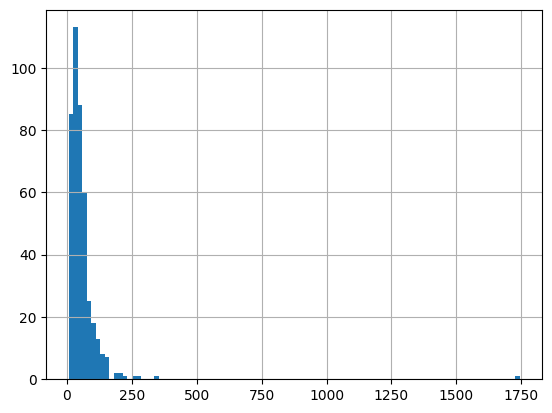

In [1139]:
combined['mql_count'].hist(bins=100)

In [1140]:
combined['mql_count'].quantile(0.95)

np.float64(131.75)

In [1143]:
# Filter for GA3 data
combined = combined[combined['date']<pd.Timestamp('2025-05-01').date()]
combined['averageMQL'] = (combined['mql_count'].shift(1) + combined['mql_count'].shift(-1)) / 2
combined['smoothed_MQL'] = np.where(combined['mql_count']>130,combined['averageMQL'] , combined['mql_count'])

In [1144]:
combined[combined['date']==pd.Timestamp('2024-10-15').date()]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,averageMQL,smoothed_MQL
187,202442,2024-10-15,42,2024,238767.0,95.0,12605.50999,178616,1038,1284.0,...,249.0,6233.39,12400.0,0.0,340,3896.0,10,18677.0,79.0,79.0


In [1145]:
combined['daily_avg_queries'] = combined['daily_avg_queries'].fillna('0')

In [1146]:
train_small = combined[combined['date']<=pd.Timestamp('2024-10-11').date()]
test_small = combined[(combined['date']>pd.Timestamp('2024-10-11').date()) & (combined['date']<pd.Timestamp('2024-12-11').date())]

In [1147]:
train_small

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,averageMQL,smoothed_MQL
0,202415,2024-04-11,15,2024,209194.0,332.0,11063.500000,186008,1265,1324.0,...,460.0,6448.16,9873.0,0.0,61,5091.0,4,24779.0,NaN,61.0
1,202415,2024-04-12,15,2024,167947.0,227.0,10985.400000,167930,1187,1127.0,...,472.0,4544.18,7438.0,0.0,60,4936.0,4,24779.0,41.0,60.0
2,202415,2024-04-13,15,2024,76022.0,186.0,8826.290000,124526,930,504.0,...,468.0,1676.13,8682.0,0.0,21,2708.0,4,24779.0,45.0,21.0
3,202415,2024-04-14,15,2024,93371.0,120.0,7257.840000,111431,844,519.0,...,570.0,2054.01,4673.0,0.0,30,2665.0,4,24779.0,68.5,30.0
4,202416,2024-04-15,16,2024,219057.0,182.0,10275.430000,159627,1160,1133.0,...,464.0,5510.42,8131.0,0.0,116,7681.0,4,24779.0,41.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,202441,2024-10-07,41,2024,242391.0,287.0,14586.519979,198788,1121,1262.0,...,254.0,7713.02,8243.0,0.0,52,4491.0,10,18677.0,34.0,52.0
180,202441,2024-10-08,41,2024,236612.0,253.0,14509.679980,199314,1138,1312.0,...,243.0,6724.63,8472.0,0.0,39,4255.0,10,18677.0,63.0,39.0
181,202441,2024-10-09,41,2024,224124.0,204.0,13807.429987,183029,1059,1176.0,...,279.0,6492.83,8252.0,36289.0,74,5723.0,10,18677.0,46.0,74.0
182,202441,2024-10-10,41,2024,197979.0,183.0,12672.849993,190614,1089,1108.0,...,247.0,6564.23,8521.0,0.0,53,4452.0,10,18677.0,57.0,53.0


In [1148]:
train_small.to_csv('mmm_train_small.csv')
test_small.to_csv('mmm_test_small.csv')

In [1149]:
train_small.shape

(184, 26)

In [1150]:
len(['ga4_sessions',
 'podcast_streams',
 'linkedin_spend',
 'linkedin_impressions',
 'linkedin_clicks',
 'gSearch_sessions',
 'gSearch_impressions',
 'gift_spend',
 'email_opened_cnt',
 'direct_spend',
 'fb_spend',
 'fb_impressions',
 'fb_clicks',
 'googleAds_spend',
 'googleAds_impressions',
 'daily_avg_queries'])

16

In [1151]:
train_all = combined[combined['date']<=pd.Timestamp('2025-03-11').date()]
test_all = combined[combined['date']>pd.Timestamp('2025-03-11').date()]

In [1152]:
test_all[test_all['daily_avg_queries'].isnull()==True]

,model_week,date,iso_week,iso_year,ga4_sessions,podcast_streams,linkedin_spend,linkedin_impressions,linkedin_clicks,gSearch_sessions,...,fb_clicks,googleAds_spend,googleAds_impressions,event_spend,mql_count,impactDotCom_ga4_sessions,month,daily_avg_queries,averageMQL,smoothed_MQL


In [1153]:
import pandas as pd

# Assuming your DataFrame has a date column called 'date'
df = train_all.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Find gaps larger than 1 day
df['date_diff'] = df['date'].diff().dt.days
non_sequential = df[df['date_diff'] > 1]
print(non_sequential)


Empty DataFrame
Columns: [model_week, date, iso_week, iso_year, ga4_sessions, podcast_streams, linkedin_spend, linkedin_impressions, linkedin_clicks, gSearch_sessions, gSearch_impressions, gift_spend, email_opened_cnt, direct_spend, fb_spend, fb_impressions, fb_clicks, googleAds_spend, googleAds_impressions, event_spend, mql_count, impactDotCom_ga4_sessions, month, daily_avg_queries, averageMQL, smoothed_MQL, date_diff]
Index: []

[0 rows x 27 columns]


In [1154]:
train_all.to_csv('mmm_train_all.csv')
test_all.to_csv('mmm_test_all.csv')

In [931]:
train_all.shape

(335, 26)